# May 11th

In [53]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [54]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [55]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [56]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [57]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-11', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [58]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,@sleepybugzz @JapantradingLTD @binance @Cripto...
1,BREAKING NEWS: @binance will be listing $OOE i...
2,@AirdropDet This project has a very bright fut...
3,"@derektmead #Bitcoin is an ultra secure, 100%..."
4,Invite New Users to KuCoin to earn rewards!\nU...
5,Invite New Users to KuCoin to earn rewards!\nU...
6,@WatcherGuru We used to be afraid of wolves. B...
7,@TheMoonCarl Fear the day you are surrounded b...
8,@wayki_chain has been continuously upgraded an...
9,Check out my new NFT on OpenSea! https://t.co/...


In [59]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [60]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,@sleepybugzz @JapantradingLTD @binance @Cripto...,@sleepybugzz @JapantradingLTD @binance @Cripto...
1,BREAKING NEWS: @binance will be listing $OOE i...,BREAKING NEWS: @binance will be listing $OOE i...
2,@AirdropDet This project has a very bright fut...,@AirdropDet This project has a very bright fut...
3,"@derektmead #Bitcoin is an ultra secure, 100%...","@derektmead Bitcoin is an ultra secure, 100% ..."
4,Invite New Users to KuCoin to earn rewards!\nU...,Invite New Users to KuCoin to earn rewards!Up ...


In [61]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,@sleepybugzz @JapantradingLTD @binance @Cripto...,@sleepybugzz @JapantradingLTD @binance @Cripto...,0.000000,0.000000
1,BREAKING NEWS: @binance will be listing $OOE i...,BREAKING NEWS: @binance will be listing $OOE i...,0.000000,0.000000
2,@AirdropDet This project has a very bright fut...,@AirdropDet This project has a very bright fut...,0.595000,0.492000
3,"@derektmead #Bitcoin is an ultra secure, 100%...","@derektmead Bitcoin is an ultra secure, 100% ...",0.525000,0.266667
4,Invite New Users to KuCoin to earn rewards!\nU...,Invite New Users to KuCoin to earn rewards!Up ...,0.618182,0.412121
5,Invite New Users to KuCoin to earn rewards!\nU...,Invite New Users to KuCoin to earn rewards!Up ...,0.618182,0.412121
6,@WatcherGuru We used to be afraid of wolves. B...,@WatcherGuru We used to be afraid of wolves. B...,0.766667,-0.233333
7,@TheMoonCarl Fear the day you are surrounded b...,@TheMoonCarl Fear the day you are surrounded b...,0.400000,-0.050000
8,@wayki_chain has been continuously upgraded an...,@wayki_chain has been continuously upgraded an...,0.366667,0.033333
9,Check out my new NFT on OpenSea! https://t.co/...,Check out my new NFT on OpenSea! via @opensea...,0.454545,0.170455


In [62]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [63]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,@sleepybugzz @JapantradingLTD @binance @Cripto...,@sleepybugzz @JapantradingLTD @binance @Cripto...,0.000000,0.000000,Neutral
1,BREAKING NEWS: @binance will be listing $OOE i...,BREAKING NEWS: @binance will be listing $OOE i...,0.000000,0.000000,Neutral
2,@AirdropDet This project has a very bright fut...,@AirdropDet This project has a very bright fut...,0.595000,0.492000,Positive
3,"@derektmead #Bitcoin is an ultra secure, 100%...","@derektmead Bitcoin is an ultra secure, 100% ...",0.525000,0.266667,Positive
4,Invite New Users to KuCoin to earn rewards!\nU...,Invite New Users to KuCoin to earn rewards!Up ...,0.618182,0.412121,Positive
5,Invite New Users to KuCoin to earn rewards!\nU...,Invite New Users to KuCoin to earn rewards!Up ...,0.618182,0.412121,Positive
6,@WatcherGuru We used to be afraid of wolves. B...,@WatcherGuru We used to be afraid of wolves. B...,0.766667,-0.233333,Negative
7,@TheMoonCarl Fear the day you are surrounded b...,@TheMoonCarl Fear the day you are surrounded b...,0.400000,-0.050000,Negative
8,@wayki_chain has been continuously upgraded an...,@wayki_chain has been continuously upgraded an...,0.366667,0.033333,Positive
9,Check out my new NFT on OpenSea! https://t.co/...,Check out my new NFT on OpenSea! via @opensea...,0.454545,0.170455,Positive


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


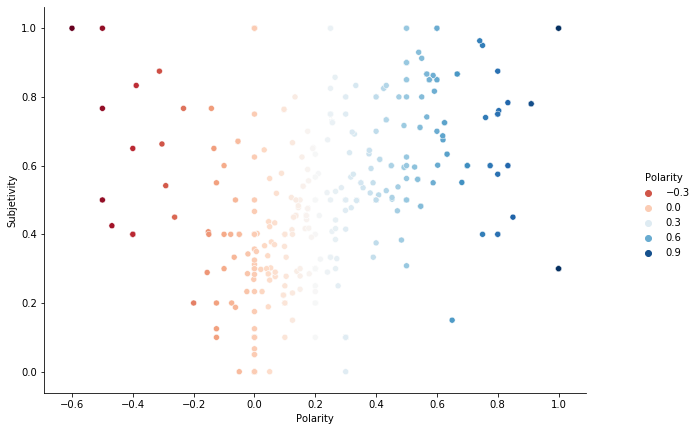

In [64]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

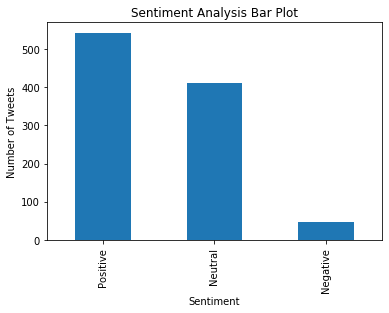

In [65]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [66]:
df['Sentiment'].value_counts()

Positive    542
Neutral     412
Negative     46
Name: Sentiment, dtype: int64

In [67]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

[542, 412, 46]

In [68]:
dfs = pd.read_csv("f_sentiments.csv")
  
# updating the column value/data
dfs.loc[1, 'Sentiment'] = 'day 2'
dfs.loc[1, 'Positive'] = lst_df[0]
dfs.loc[1, 'Neutral'] = lst_df[1]
dfs.loc[1, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("f_sentiments.csv", index=False)
  
print(dfs)

  Sentiment  Positive  Neutral  Negative
0     day 1     540.0    414.0      46.0
1     day 2     542.0    412.0      46.0


In [69]:
#1006, 658, 157